# **Importation des Librairies** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Ouverture du csv, un peu long car volumineux**

In [4]:
df=pd.read_csv('/content/gdrive/My Drive/Val_projet/airbnb.csv',";")

Le dataframe est immense et nous n'allons pas tout utiliser, nous supprimons toutes les colonnes qui ne sont pas utiles à notre recherche. Nous pourrons toujours venir les rechercher si nous en avons le besoin


In [5]:
#Premiere supression de variables pas utiles à notre analyse
df=df.drop(['Listing Url','Scrape ID','Last Scraped','Host Acceptance Rate','Scrape ID','Last Scraped',
            'Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host URL','Host Acceptance Rate',
           'Host Thumbnail Url','Host Picture Url','Host Verifications','Neighbourhood','Neighbourhood Group Cleansed',
           'Geolocation','Has Availability','Calendar last Scraped','License','Jurisdiction Names'], axis=1)

In [6]:
#deuxieme supression de variables pas utiles à notre analyse
df=df.drop(['Summary','Space','Experiences Offered','Notes','Access','State','Zipcode','Host Name','Host Location','Host Neighbourhood', 'Host ID',
           'Host Listings Count','Smart Location','Country Code','Square Feet','Security Deposit','Calendar Updated',
            'Guests Included','Extra People','Street','Country','Cancellation Policy','Calculated host listings count','Features','Market'], axis=1)

In [7]:
#On rename les colonnes qui ont des espaces
df.rename(columns={'ID':"id",'Name': 'name', 'Description': 'description', 'Host About': 'host_about', 'Host Response Time': 'host_response_time', 'Host Response Rate': 'host_response_rate', 'Host Total Listings Count': 'host_total_listing_count', 'Neighbourhood Cleansed': 'neighbourhood_cleansed' , 'City': 'city', 'Property Type': 'property_type', 'Room Type': 'room_type', 'Accommodates': 'accommodates'
, 'Bathrooms': 'bathrooms', 'Bedrooms': 'bedrooms', 'Beds': 'beds', 'Bed Type': 'bed_type', 'Amenities': 'amenities', 'Price': 'price', 'Weekly Price': 'weekly_price', 'Monthly Price': 'monthly_price', 'Cleaning Fee': 'cleaning_fee', 'Minimum Nights': 'minimum_nights', 'Maximum Nights': 'maximum_nights', 'Availability 30': 'availability_30', 'Availability 60': 'availability_60', 'Availability 90': 'availability_90', 'Availability 365': 'availability_365', 'Number of Reviews': 'number_of_reviews', 'First Review': 'first_review'
, 'Last Review': 'last_review', 'Review Scores Rating': 'review_scores_rating', 'Review Scores Accuracy': 'review_scores_accuracy', 'Review Scores Cleanliness': 'review_scores_cleanliness', 'Review Scores Checkin': 'review_scores_checkin', 'Review Scores Communication': 'review_scores_communication', 'Review Scores Location': 'review_scores_location', 'Review Scores Value': 'review_scores_value', 'Reviews per Month': 'reviews_per_month', 'Longitude': 'longitude','Latitude': 'latitude',"Neighborhood Overview":"neighborhood_overview","Transit":"transit","Interaction":"interaction","House Rules":"house_rules","Host Since":"host_since"}, inplace=True)

In [8]:
# on met la colonne id en index

df=df.set_index("id")

In [9]:
#Nous allons nous concentrer sur les villes de Paris et Londres, avant de commencer le nettoyage nous allons garder uniquement toutes les données concernant ces deux villes

#on divise le df par villes puis on les regroupe dans df
df_paris=df[df.city=='Paris']
df_london=df[df.city=='London']
df = df_paris.append(df_london)

In [10]:
#On verifie qu'il reste bien uniquement Paris et Londre
print(df['city'].unique())

['Paris' 'London']


# **Analyse du dataframe**

In [11]:
#informations
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101936 entries, 7735531 to 14561490
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   name                         101932 non-null  object 
 1   description                  101922 non-null  object 
 2   neighborhood_overview        60460 non-null   object 
 3   transit                      64012 non-null   object 
 4   interaction                  52028 non-null   object 
 5   house_rules                  58563 non-null   object 
 6   host_since                   101917 non-null  object 
 7   host_about                   58891 non-null   object 
 8   host_response_time           72188 non-null   object 
 9   host_response_rate           72188 non-null   float64
 10  host_total_listing_count     101917 non-null  float64
 11  neighbourhood_cleansed       101936 non-null  object 
 12  city                         101936 non-null  object 
 

In [12]:
#Somme des Nans par colonne
df.isna().sum()

name                               4
description                       14
neighborhood_overview          41476
transit                        37924
interaction                    49908
house_rules                    43373
host_since                        19
host_about                     43045
host_response_time             29748
host_response_rate             29748
host_total_listing_count          19
neighbourhood_cleansed             0
city                               0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                        371
bedrooms                         220
beds                             207
bed_type                           0
amenities                        944
price                            107
weekly_price                   77187
monthly_price                  82500
cleaning_fee                   37986
m

In [13]:
#Somme des Nans par colonne
print('\n Données manquantes par colonne :\n')
print(df.isna().sum())


 Données manquantes par colonne :

name                               4
description                       14
neighborhood_overview          41476
transit                        37924
interaction                    49908
house_rules                    43373
host_since                        19
host_about                     43045
host_response_time             29748
host_response_rate             29748
host_total_listing_count          19
neighbourhood_cleansed             0
city                               0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                        371
bedrooms                         220
beds                             207
bed_type                           0
amenities                        944
price                            107
weekly_price                   77187
monthly_price                  82500
cl

In [14]:
#Verification des doublons
df.duplicated().sum()

0

In [15]:
#Nombre de valeur unique par colonne
df.nunique()

name                            98320
description                    100242
neighborhood_overview           55331
transit                         59619
interaction                     44384
house_rules                     49835
host_since                       2680
host_about                      41051
host_response_time                  4
host_response_rate                 89
host_total_listing_count           93
neighbourhood_cleansed             53
city                                2
latitude                       101936
longitude                      101936
property_type                      30
room_type                           3
accommodates                       16
bathrooms                          17
bedrooms                           11
beds                               17
bed_type                            5
amenities                       76604
price                             626
weekly_price                      743
monthly_price                    1771
cleaning_fee

In [16]:
#description
df.describe()

,host_response_rate,host_total_listing_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,cleaning_fee,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,72188.000000,101917.000000,101936.000000,101936.000000,101936.000000,101565.000000,101716.000000,101729.000000,101829.000000,24749.000000,19436.000000,63950.000000,101936.000000,1.019360e+05,101936.000000,101936.000000,101936.000000,101936.000000,101936.000000,72587.000000,72383.000000,72439.000000,72312.000000,72431.000000,72337.000000,72317.000000,74087.000000
mean,92.151189,10.750542,50.096122,1.197706,3.052631,1.173844,1.195741,1.694325,95.556305,487.487454,2102.687384,36.597310,3.558517,2.032332e+05,9.611256,21.160434,34.223532,147.797903,13.852417,91.757326,9.453850,9.181863,9.630200,9.667960,9.444060,9.230845,1.239842
std,19.620885,63.305763,1.321461,1.231203,1.694476,0.472979,0.831889,1.110724,77.309871,202.250135,1717.009301,30.912555,49.507654,1.980309e+07,11.384456,23.016814,35.037511,141.943321,28.143270,9.190901,0.911229,1.136724,0.787641,0.773441,0.831827,0.953944,1.424954
min,0.000000,0.000000,48.814903,-0.479218,1.000000,0.000000,0.000000,0.000000,0.000000,27.000000,96.000000,4.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000
25%,96.000000,1.000000,48.862998,-0.112300,2.000000,1.000000,1.000000,1.000000,50.000000,325.000000,1120.000000,20.000000,1.000000,4.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,0.280000
50%,100.000000,1.000000,48.890707,2.288539,2.000000,1.000000,1.000000,1.000000,75.000000,450.000000,1659.000000,30.000000,2.000000,1.125000e+03,4.000000,11.000000,22.000000,90.000000,3.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,0.710000
75%,100.000000,2.000000,51.512883,2.350013,4.000000,1.000000,1.000000,2.000000,110.000000,607.000000,2500.000000,50.000000,3.000000,1.125000e+03,19.000000,43.000000,69.000000,301.000000,14.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.670000
max,100.000000,735.000000,51.654377,2.458650,16.000000,8.000000,10.000000,16.000000,999.000000,999.000000,50000.000000,750.000000,10000.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,488.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,18.000000


# **Démarrons maintenant le nettoyage**

In [17]:
#On supprime les lignes dont les reviews ne sont pas renseignés étant donnée que c'est un point important de notre analyse
df=df.dropna(axis=0,subset=["first_review","last_review","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"])

In [18]:
#Maintenant que toutes les données ont une note attribuée, nous allons affiner en retirant les lignes qui ont des nans et qui peuvent fausser notre analyse.
df=df.dropna(axis=0,subset=["description","name","host_since","host_total_listing_count","price"]) 

In [19]:
#On supprime ces deux variables qui présentent trop de données manquantes pour être exploitées et qui sont difficiles à remplacer sans impacter les résultats de l'analyse
#df=df.drop(['host_response_time','host_response_rate'], axis=1)

In [20]:
# on remplace les nans des colonnes non renseigné volontairement par "nr", et "0" pour les colonnes numériques 'weekly_price','montly_price' et 'cleaning_fee'
# De plus, on remplace par 0 les Nans de 'bathrooms','bedrooms' et 'bed' que l'on conciderera par non renseigné par la suite

# afin de tout de même prendre en compte cette donnée et de ne pas fausser les analyses futures
# En effet, il y a énormément d'annonces dont ces colonnes ne sont pas remplies donc on ne peut pas simplement les supprimer

#je souhaitais garder les variables numerique et objet comme elles etaient, d'où le 'nr pour objet et 0 pour numerique (je n'ai pas trouvé par quoi d'autre que 0 totu en gardant la variable en numerique)

df["neighborhood_overview"]=df["neighborhood_overview"].fillna("nr")
df["transit"]=df["transit"].fillna("nr")
df["interaction"]=df["interaction"].fillna("nr")
df["house_rules"]=df["house_rules"].fillna("nr")
df["host_about"]=df["host_about"].fillna("nr")
df["amenities"]=df["amenities"].fillna("nr")
df["bathrooms"]=df["bathrooms"].fillna(0)
df["bedrooms"]=df["bedrooms"].fillna(0)
df["beds"]=df["beds"].fillna(0)
df["weekly_price"]=df["weekly_price"].fillna(0)
df["monthly_price"]=df["monthly_price"].fillna(0)
df["cleaning_fee"]=df["cleaning_fee"].fillna(0)

#Si on change d'avis concernant ces deux variables
# Et nous remplaçons les Nan de 'host_response_rate' par la moyenne, car 0 aurait un trop grand impact et 'nr' transformera la variable en 'objet'
df["host_response_rate"]=df["host_response_rate"].fillna(df["host_response_rate"].mean())
df["host_response_time"]=df["host_response_time"].fillna("nr")

In [21]:
#On vérifie si il reste des Nans.
print('\n Données manquantes par colonne :\n')
print(df.isna().sum())

#Non tout est bon, on peut passer à la suite


 Données manquantes par colonne :

name                           0
description                    0
neighborhood_overview          0
transit                        0
interaction                    0
house_rules                    0
host_since                     0
host_about                     0
host_response_time             0
host_response_rate             0
host_total_listing_count       0
neighbourhood_cleansed         0
city                           0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type                       0
amenities                      0
price                          0
weekly_price                   0
monthly_price                  0
cleaning_fee                   0
minimum_nights                 0
maximum_nights                 0
availab

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72103 entries, 7735531 to 9973188
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         72103 non-null  object 
 1   description                  72103 non-null  object 
 2   neighborhood_overview        72103 non-null  object 
 3   transit                      72103 non-null  object 
 4   interaction                  72103 non-null  object 
 5   house_rules                  72103 non-null  object 
 6   host_since                   72103 non-null  object 
 7   host_about                   72103 non-null  object 
 8   host_response_time           72103 non-null  object 
 9   host_response_rate           72103 non-null  float64
 10  host_total_listing_count     72103 non-null  float64
 11  neighbourhood_cleansed       72103 non-null  object 
 12  city                         72103 non-null  object 
 13  latitude     

In [23]:
#On fait une sauvegarde du dataset nettoyé
#df.to_pickle("airbnbcleaned.csv")

# **Exploration des variables**

In [24]:

#On stock les variables numérique dans num_df
num_df=df.select_dtypes(include="float64")

In [25]:
#On affiche la moyenne de chaque variable numerique dans un df appelé stats
stats = pd.DataFrame(num_df.mean(), columns = ['moyenne'])
stats.round(2)

#On remarque un soucis dans la variable 'maximum_nights'
#Et potentiellement des erreurs dans le 'minimum_nights' qui devrait etre proche de 1

,moyenne
host_response_rate,93.47
host_total_listing_count,7.04
latitude,50.04
longitude,1.25
accommodates,3.09
bathrooms,1.16
bedrooms,1.17
beds,1.70
price,93.22
weekly_price,137.39




 Il semble y avoir des valeurs abérrantes dans maximum_nights pour avoir des valeurs si élevées

 Nous allons donc regarder cette variable ainsi que minimum_nights

In [26]:
#On recherche le bien avec la valeur la plus élevé pour maximum_nights
num_df['maximum_nights'].idxmax(axis = 0)

642950

In [27]:
#On affiche le logement qui a la valeur la plus élevée pour maximum_nights
print(df.loc[642950])
#Nous constatons une valeur abérrante

name                                         Studio + Garden + BBQ in Montmartre
description                    Cosy Studio in the heart of the 18th down the ...
neighborhood_overview          I will give you a list of cafés, bars and rest...
transit                                                                       nr
interaction                    I Will be In touch through text message, tel o...
house_rules                                                                   nr
host_since                                                            2012-08-09
host_about                     I lived in San Francisco for 6 years. Back in ...
host_response_time                                                within an hour
host_response_rate                                                            95
host_total_listing_count                                                       3
neighbourhood_cleansed                                         Buttes-Montmartre
city                        

In [28]:
#On affiche un autre bien qui contient des valeur abérrantes
print(df.loc[9112784])   #valeur aberrante minimum night 3888 et maximum night 9999

name                                    APARTMENT FOR 4 PEOPLE IN CENTRAL LONDON
description                    The apartment is situated in a very central lo...
neighborhood_overview          You are in the middle of it all with all the f...
transit                        Barbican Tube Station - 8 minutes walk Farring...
interaction                    I am available via e-mail and (SENSITIVE CONTE...
house_rules                    No smoking, no drugs, and no pets allowed. It ...
host_since                                                            2013-07-22
host_about                     Am a globetrotter - lived and worked all aroun...
host_response_time                                                within an hour
host_response_rate                                                           100
host_total_listing_count                                                       1
neighbourhood_cleansed                                                 Islington
city                        

In [29]:
#print(df.loc[10192308 ])

In [30]:
#print(df.sort_values(by = 'maximum_nights').tail(40))

In [31]:
#print(df.sort_values(by = 'minimum_nights').tail(40))

A peu près 30 annonces ont une valeur abérrante pour la variable 'minimum_nights'

A peu près 80 annonces ont une valeur abérrante pour la variable 'maximum_nights'

In [32]:
#On change les valeur aberrante (qui depasse 365jours) de maximum_nights en valeur de la variable 'availability_365', qui semble plus logique
num_df['maximum_nights'] = np.where(num_df['maximum_nights'] > 365, num_df['availability_365'], num_df['maximum_nights'])


In [33]:
#On verifie quel est le logement avec le plus grand nombre de maximum_nights
num_df['maximum_nights'].idxmax(axis = 0)

1372747

In [34]:
#On utilise cet index pour repérer le logement
print(df.loc[1372747])
#On constate qu'il a 365 donc plus de valeur aberrante dans cette variable

name                                                      Charming Studio Marais
description                    APARTMENT INFORMATION This charming and comfor...
neighborhood_overview                                                         nr
transit                                                                       nr
interaction                                                                   nr
house_rules                                              Minimum stays of 1 week
host_since                                                            2013-07-12
host_about                                                                    nr
host_response_time                                            within a few hours
host_response_rate                                                            80
host_total_listing_count                                                       8
neighbourhood_cleansed                                            Hôtel-de-Ville
city                        

In [35]:
#On modifie les valeurs abérrantes de minimum_nights en remplaçant toutes les valeurs au dessus de 31 jours par 1
num_df.minimum_nights[num_df.minimum_nights > 31] = 1


In [36]:
#On verifie quel est le plus grand nombre de minimum_nights
num_df['maximum_nights'].idxmax(axis = 0)

1372747

In [37]:
#On affiche le logement avec l'index qui le plus grand nombre de minimum_night
print(df.loc[1372747])

#on ne remarque plus de valeur aberrante mais on remarque que ce logement a ausi le nombre de maximum_night maximum
#cet utilisateur loue donc pour des longues durées
# il a par ailleurs fait une erreur soit dans house_rules soit dans minimum_night car le nombre de nuitées minimum entrées ne correspond pas aux house_rules

name                                                      Charming Studio Marais
description                    APARTMENT INFORMATION This charming and comfor...
neighborhood_overview                                                         nr
transit                                                                       nr
interaction                                                                   nr
house_rules                                              Minimum stays of 1 week
host_since                                                            2013-07-12
host_about                                                                    nr
host_response_time                                            within a few hours
host_response_rate                                                            80
host_total_listing_count                                                       8
neighbourhood_cleansed                                            Hôtel-de-Ville
city                        

In [38]:
#On refait la moyenne de chaque variable numerique dans un df appelé stats
stats2 = pd.DataFrame(num_df.mean(), columns = ['moyenne'])
stats2.round(2)

,moyenne
host_response_rate,93.47
host_total_listing_count,7.04
latitude,50.04
longitude,1.25
accommodates,3.09
bathrooms,1.16
bedrooms,1.17
beds,1.70
price,93.22
weekly_price,137.39


In [39]:
#On fait la mediane
stats2['median'] = num_df.median()
stats2

,moyenne,median
host_response_rate,93.466603,100.000000
host_total_listing_count,7.042647,1.000000
latitude,50.042177,48.887775
longitude,1.247832,2.296717
accommodates,3.091078,2.000000
bathrooms,1.157691,1.000000
bedrooms,1.173904,1.000000
beds,1.703452,1.000000
price,93.215664,75.000000
weekly_price,137.394034,0.000000


In [40]:
#On crée une variable mean_med_diff correspondant à la valeur absolue de la différence entre moyenne et médiane.
stats2['mean_med_diff'] = abs(stats2['moyenne'] - stats2['median'])
stats2.round(2)

,moyenne,median,mean_med_diff
host_response_rate,93.47,100.00,6.53
host_total_listing_count,7.04,1.00,6.04
latitude,50.04,48.89,1.15
longitude,1.25,2.30,1.05
accommodates,3.09,2.00,1.09
bathrooms,1.16,1.00,0.16
bedrooms,1.17,1.00,0.17
beds,1.70,1.00,0.70
price,93.22,75.00,18.22
weekly_price,137.39,0.00,137.39


In [41]:
#On ajoute les 3 colonnes qui correponde aux 3 quantiles de chaques variables numérique
stats2[['q1', 'q2', 'q3']] = num_df.quantile(q = [0.25,0.5,0.75]).transpose()

In [42]:
#On peut compléter notre analyse en s'intéressant au min, max de chaque variable. 
#La différence des deux nous donnera une idée de l'étendue sur laquelle se répartissent les valeurs.
stats2['min'] = num_df.min()
stats2['max'] = num_df.max()
stats2['min_max_diff'] = stats2['max'] - stats2['min']
stats2

,moyenne,median,mean_med_diff,q1,q2,q3,min,max,min_max_diff
host_response_rate,93.466603,100.000000,6.533397,93.466603,100.000000,100.000000,0.000000,100.000000,100.000000
host_total_listing_count,7.042647,1.000000,6.042647,1.000000,1.000000,2.000000,0.000000,735.000000,735.000000
latitude,50.042177,48.887775,1.154402,48.861769,48.887775,51.511102,48.816590,51.653192,2.836602
longitude,1.247832,2.296717,1.048885,-0.108708,2.296717,2.351539,-0.479218,2.421537,2.900755
accommodates,3.091078,2.000000,1.091078,2.000000,2.000000,4.000000,1.000000,16.000000,15.000000
bathrooms,1.157691,1.000000,0.157691,1.000000,1.000000,1.000000,0.000000,8.000000,8.000000
bedrooms,1.173904,1.000000,0.173904,1.000000,1.000000,1.000000,0.000000,10.000000,10.000000
beds,1.703452,1.000000,0.703452,1.000000,1.000000,2.000000,0.000000,16.000000,16.000000
price,93.215664,75.000000,18.215664,50.000000,75.000000,110.000000,8.000000,999.000000,991.000000
weekly_price,137.394034,0.000000,137.394034,0.000000,0.000000,250.000000,0.000000,999.000000,999.000000


On remarque que la médiane et la moyenne de la variable cible "review_scores_rating" sont très proche.

Il en est quasiment de même pour toutes les variables scores.

Ces variable sont donc hétérogènes.

Les variables les moins hétérogènes sont beds, host_total_listing_counts, host_response_rate, price, weekly_price, monthly_price et maximum_nights.

Pour la variable beds, on peut estimer que la moyenne se rapproche de 2 lits car il nous faut seulement des nombres entiers (un lit ne se divise pas).

Les résultats nous montrent que la moyenne est influencée par les valeurs extrêmes. Bien que la moyenne du nombre de lits par logement est de 2, il y a plus de logements avec un seul lit.

La différence entre la moyenne et la médiane de host_total_listing_count est très importante.

On en déduit que la moyenne est très impactée par les valeurs extrêmes et donc les propriétaires qui ont un usage commercial de Airbnb et mettent en lignes de nombreuses annnonces.

La valeur de la médiane, 1, nous informe que la grande majorité des propriétaires ne mettent qu'un logement en location.

La différence entre la moyenne et la médiane de la variable prix est assez importante. Le prix médian est bien inférieur au prix médian.

Les valeurs de weekly_price et monthly_price nous laisse supposer que peu de personne propose de prix à la semaine ou au mois.

In [43]:
# tests de dépendance entre variables numériques:

#import pearsonr from scipy.stats
from scipy.stats.stats import pearsonr
#teste de correlation entre le nombre de review et la note globale d'une annonce
pd.DataFrame(pearsonr(df["number_of_reviews"],df["review_scores_rating"]),index=["pearson_coeff","p-value"],columns=["résultat_test"])
#la p-value > 5%, le coefficient proche de 0, il n'y a pas de corrélation entre les deux variables.

,résultat_test
pearson_coeff,0.003492
p-value,0.348390


# **Analyse des variables catégorielles**

In [44]:
#On determine les variables catégorielles et on les stock dans cat_df
cat_df = df.select_dtypes(include=['O'])

In [45]:
#On affiche les variables categorielles
cat_df.head()

#host_since, first_review er last_review, n'ont rien a faire ici donc elles seront donc transformées en variables 'date time'

,name,description,neighborhood_overview,transit,interaction,house_rules,host_since,host_about,host_response_time,neighbourhood_cleansed,city,property_type,room_type,bed_type,amenities,first_review,last_review
id,,,,,,,,,,,,,,,,,
7735531,Petit cocon au coeur de Paris,"Bienvenue chez moi, j'habite en plein centre d...","Mon quartier ""Le Marais"" est unique à Paris. A...",Mon appartement est à seulement quelques mètre...,Je serais entièrement disponible pour répondre...,De la propreté et du respect ! Prenez svp vos ...,2015-06-11,"Bonjour, je travaille dans l'hôtellerie depuis...",within an hour,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,"Wireless Internet,Kitchen,Elevator in building...",2015-09-06,2017-04-02
3036231,Enjoy the lovely heart of Paris !,Beautiful and lightful 58 m2 apartment close t...,Le Marais est un quartier incroyable pour se b...,"Proche Ligne 1 (Saint-Paul, Bastille) et 8 (Ch...",nr,nr,2013-05-19,"Bonjour tout le monde,\r\n\r\nJe me prénomme P...",within an hour,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Heating,...",2014-07-16,2017-02-26
2183529,Studio Saint Paul,Colourful and bright studio for 2 guests in a ...,"Located on a great and quiet neighbourhood, wi...",The closest subway station is Saint Paul on li...,After confirming the booking I send you a welc...,No Pets. No Smoking. No Parties.,2013-12-11,I am an architect with a passion for photograp...,within a few hours,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",2014-06-09,2017-02-07
515970,160 M2 Place des Vosges .Marais.,Welcome to this beautiful apartment which is l...,"The apartment is in the center of Paris , in t...","The subway is at one minute , walking distance.",I can help you all the time during your stay,This is a protected historical building which ...,2012-05-27,I am french and I am a painter. I'm in my for...,within an hour,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",2012-08-13,2017-01-03
3144316,Heart Marais-22m2 Lovely Studio,Located in the heart of Marais District (Rue d...,-A Large variety of restaurants (rue des rosie...,The nearest tube stations are Saint Paul line ...,nr,nr,2014-05-20,"Hi my name is Lea, I was born in Paris have li...",within a few hours,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",2014-06-08,2017-03-16


In [46]:
#On regarde la fréquence des modalités de la variable property_type
cat_df['property_type'].value_counts(normalize = True)

Apartment             0.866746
House                 0.095960
Bed & Breakfast       0.011872
Loft                  0.008807
Townhouse             0.003786
Other                 0.003523
Condominium           0.002399
Dorm                  0.001720
Guesthouse            0.001207
Boat                  0.000929
Boutique hotel        0.000832
Serviced apartment    0.000652
Hostel                0.000499
Cabin                 0.000444
Bungalow              0.000153
Villa                 0.000139
Camper/RV             0.000083
Chalet                0.000042
Earth House           0.000028
Castle                0.000028
Yurt                  0.000028
Hut                   0.000014
Timeshare             0.000014
Igloo                 0.000014
Ryokan (Japan)        0.000014
Treehouse             0.000014
Tent                  0.000014
Parking Space         0.000014
Cave                  0.000014
Tipi                  0.000014
Name: property_type, dtype: float64

In [47]:
#Nous allons garder uniquement les types de propriété 'Apartment' et 'House' qui représente 99,6% du dataset
cat_df['property_type']=cat_df['property_type'].loc[cat_df['property_type'].isin(['Apartment','House'])]

#On supprime les ligne qui ne sont pas des appartement ou maison (devenu Nans avec le code précédent) 
cat_df=cat_df.dropna(axis=0,subset=['property_type'])

In [48]:
#On regarde la fréquence des modalités de la variable room_type
cat_df['room_type'].value_counts(normalize = True)

Entire home/apt    0.736249
Private room       0.255957
Shared room        0.007794
Name: room_type, dtype: float64

In [49]:
#Nous allons garder uniquement les types de chambre 'Entire home/apt' et 'Private room' qui représente 99,9% du dataset
cat_df['room_type']=cat_df['room_type'].loc[cat_df['room_type'].isin(['Entire home/apt','Private room'])]

#On supprime les ligne qui ne sont pas des 'Entire home/apt' ou 'Private room' (devenu Nans avec le code précédent) 
cat_df=cat_df.dropna(axis=0,subset=['room_type'])

In [50]:
#on regarde la fréquence des modalites de la variable city
cat_df['city'].value_counts(normalize = True)

Paris     0.557679
London    0.442321
Name: city, dtype: float64

beaucoup de variables catégorielles sont remplies librement par les propriétaires et donc quasiment toutes différentes.
Il conviendra donc de faire du text mining pour les analyser ultérieurement. 

In [51]:
#On ré-assemble le dataframe variable numerique + variable catégorielles
df=pd.concat([num_df,cat_df],axis=1)

In [52]:
# Mettons maintenant ces variables au format datetime

df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

In [53]:
#Maintenant le que le df est reconstitué, on supprime les lignes qui contiennent des Nans du fait des changements dans cat_df
df=df.dropna(axis=0)


In [54]:
#On affiche un df.info
df.info()
#Tout semble en ordre pour passer à la visualisation

<class 'pandas.core.frame.DataFrame'>
Index: 68873 entries, 7735531 to 9973188
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   host_response_rate           68873 non-null  float64       
 1   host_total_listing_count     68873 non-null  float64       
 2   latitude                     68873 non-null  float64       
 3   longitude                    68873 non-null  float64       
 4   accommodates                 68873 non-null  float64       
 5   bathrooms                    68873 non-null  float64       
 6   bedrooms                     68873 non-null  float64       
 7   beds                         68873 non-null  float64       
 8   price                        68873 non-null  float64       
 9   weekly_price                 68873 non-null  float64       
 10  monthly_price                68873 non-null  float64       
 11  cleaning_fee                 68873 non

In [55]:
#on divise le df par villes puis on les regroupe dans df pour ecraser les données précédentes de df_london et df_paris
df_paris=df[df.city=='Paris']
df_london=df[df.city=='London']
#On supprimme la première ligne de df_london car elle pose problème pour la visualisation par la suite et elle contient beaucoup de valeurs "Non-renseignées"
df_london.drop( df_london.index[0], inplace=True)
df = df_paris.append(df_london)

In [56]:
#On fait une sauvegarde du dataset nettoyé
#df.to_pickle("airbnbcleaned.csv")

#Ouverture avec le code suivant
#df = pd.read_pickle('airbnbcleaned.csv')

# **Convertion variables catégorielles en numerique pour les inclurent dans notre modèle**

In [57]:
#On crée une colonne review_months qui contient le nombre de mois entre first_review et last_review
df['review_months'] = 12 * (df.last_review.dt.year - df.first_review.dt.year) + (df.last_review.dt.month - df.first_review.dt.month)

In [58]:
#On verifie quel est la date max
df['last_review'].idxmax(axis = 0)

'12582056'

In [59]:
#On affiche la date de la dernière review que l'on concidèrera comme date du jour 2017-04-06
print(df.loc['12582056'])

host_response_rate                                                           100
host_total_listing_count                                                       1
latitude                                                                 48.8446
longitude                                                                 2.3809
accommodates                                                                   2
bathrooms                                                                      1
bedrooms                                                                       1
beds                                                                           1
price                                                                         64
weekly_price                                                                   0
monthly_price                                                                  0
cleaning_fee                                                                  58
minimum_nights              

In [60]:
df['today'] = pd.Timestamp('20170406')

In [61]:
#On crée une colonne host_since_months qui contient le nombre de mois entre sur airbnb
df['host_since_months'] = 12 * (df.today.dt.year - df.host_since.dt.year) + (df.today.dt.month - df.host_since.dt.month)

In [62]:
#On supprimme la colonne today qui n'a plus d'importance
del df['today']

In [63]:
df.loc[df.review_scores_rating <96,'result']='<96'
df.loc[df.review_scores_rating >=96,'result']='>=96'

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68872 entries, 7735531 to 9973188
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   host_response_rate           68872 non-null  float64       
 1   host_total_listing_count     68872 non-null  float64       
 2   latitude                     68872 non-null  float64       
 3   longitude                    68872 non-null  float64       
 4   accommodates                 68872 non-null  float64       
 5   bathrooms                    68872 non-null  float64       
 6   bedrooms                     68872 non-null  float64       
 7   beds                         68872 non-null  float64       
 8   price                        68872 non-null  float64       
 9   weekly_price                 68872 non-null  float64       
 10  monthly_price                68872 non-null  float64       
 11  cleaning_fee                 68872 non

In [65]:
#On supprime les colonnes qui n'ont pas d'importance pour le modele de prediction
df = df.drop(df.columns[[2,3,19,27,28,29,30,31,32,33,34,41,42,43]], axis=1)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68872 entries, 7735531 to 9973188
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           68872 non-null  float64
 1   host_total_listing_count     68872 non-null  float64
 2   accommodates                 68872 non-null  float64
 3   bathrooms                    68872 non-null  float64
 4   bedrooms                     68872 non-null  float64
 5   beds                         68872 non-null  float64
 6   price                        68872 non-null  float64
 7   weekly_price                 68872 non-null  float64
 8   monthly_price                68872 non-null  float64
 9   cleaning_fee                 68872 non-null  float64
 10  minimum_nights               68872 non-null  float64
 11  maximum_nights               68872 non-null  float64
 12  availability_30              68872 non-null  float64
 13  availability_

In [67]:
df.head()

,host_response_rate,host_total_listing_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,cleaning_fee,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_response_time,neighbourhood_cleansed,city,property_type,room_type,bed_type,review_months,host_since_months,result
7735531,100.0,1.0,2.0,1.0,0.0,1.0,90.0,0.0,0.0,10.0,1.0,357.0,28.0,52.0,82.0,357.0,19.0,10.0,10.0,10.0,10.0,10.0,10.0,0.98,within an hour,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,19,22,<96
3036231,100.0,2.0,6.0,1.0,2.0,2.0,140.0,0.0,0.0,10.0,7.0,21.0,0.0,3.0,3.0,21.0,17.0,10.0,9.0,9.0,10.0,10.0,10.0,0.51,within an hour,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,31,47,<96
2183529,99.0,37.0,2.0,1.0,0.0,1.0,80.0,600.0,0.0,40.0,4.0,90.0,9.0,33.0,37.0,152.0,29.0,10.0,10.0,10.0,9.0,10.0,9.0,0.84,within a few hours,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,32,40,<96
515970,100.0,1.0,7.0,2.0,5.0,5.0,690.0,0.0,0.0,200.0,3.0,30.0,17.0,38.0,61.0,301.0,64.0,9.0,9.0,9.0,9.0,10.0,9.0,1.13,within an hour,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,53,59,<96
3144316,80.0,1.0,2.0,1.0,0.0,1.0,90.0,0.0,0.0,0.0,5.0,218.0,2.0,2.0,6.0,218.0,135.0,10.0,10.0,10.0,10.0,10.0,10.0,3.92,within a few hours,Hôtel-de-Ville,Paris,Apartment,Entire home/apt,Real Bed,33,35,<96


In [68]:

X = df.drop(columns='result')
y = df['result']

X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.head()

,host_response_rate,host_total_listing_count,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,cleaning_fee,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,review_months,host_since_months,host_response_time_nr,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_cleansed_Barnet,neighbourhood_cleansed_Batignolles-Monceau,neighbourhood_cleansed_Bexley,neighbourhood_cleansed_Bourse,neighbourhood_cleansed_Brent,neighbourhood_cleansed_Bromley,neighbourhood_cleansed_Buttes-Chaumont,neighbourhood_cleansed_Buttes-Montmartre,neighbourhood_cleansed_Camden,neighbourhood_cleansed_City of London,...,neighbourhood_cleansed_Harrow,neighbourhood_cleansed_Havering,neighbourhood_cleansed_Hillingdon,neighbourhood_cleansed_Hounslow,neighbourhood_cleansed_Hôtel-de-Ville,neighbourhood_cleansed_Islington,neighbourhood_cleansed_Kensington and Chelsea,neighbourhood_cleansed_Kingston upon Thames,neighbourhood_cleansed_Lambeth,neighbourhood_cleansed_Lewisham,neighbourhood_cleansed_Louvre,neighbourhood_cleansed_Luxembourg,neighbourhood_cleansed_Merton,neighbourhood_cleansed_Ménilmontant,neighbourhood_cleansed_Newham,neighbourhood_cleansed_Observatoire,neighbourhood_cleansed_Opéra,neighbourhood_cleansed_Palais-Bourbon,neighbourhood_cleansed_Panthéon,neighbourhood_cleansed_Passy,neighbourhood_cleansed_Popincourt,neighbourhood_cleansed_Redbridge,neighbourhood_cleansed_Reuilly,neighbourhood_cleansed_Richmond upon Thames,neighbourhood_cleansed_Southwark,neighbourhood_cleansed_Sutton,neighbourhood_cleansed_Temple,neighbourhood_cleansed_Tower Hamlets,neighbourhood_cleansed_Vaugirard,neighbourhood_cleansed_Waltham Forest,neighbourhood_cleansed_Wandsworth,neighbourhood_cleansed_Westminster,neighbourhood_cleansed_Élysée,city_Paris,property_type_House,room_type_Private room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
7735531,100.0,1.0,2.0,1.0,0.0,1.0,90.0,0.0,0.0,10.0,1.0,357.0,28.0,52.0,82.0,357.0,19.0,10.0,10.0,10.0,10.0,10.0,10.0,0.98,19,22,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3036231,100.0,2.0,6.0,1.0,2.0,2.0,140.0,0.0,0.0,10.0,7.0,21.0,0.0,3.0,3.0,21.0,17.0,10.0,9.0,9.0,10.0,10.0,10.0,0.51,31,47,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2183529,99.0,37.0,2.0,1.0,0.0,1.0,80.0,600.0,0.0,40.0,4.0,90.0,9.0,33.0,37.0,152.0,29.0,10.0,10.0,10.0,9.0,10.0,9.0,0.84,32,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
515970,100.0,1.0,7.0,2.0,5.0,5.0,690.0,0.0,0.0,200.0,3.0,30.0,17.0,38.0,61.0,301.0,64.0,9.0,9.0,9.0,9.0,10.0,9.0,1.13,53,59,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3144316,80.0,1.0,2.0,1.0,0.0,1.0,90.0,0.0,0.0,0.0,5.0,218.0,2.0,2.0,6.0,218.0,135.0,10.0,10.0,10.0,10.0,10.0,10.0,3.92,33,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


# **Prédictions DecisionTree**

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve, auc
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,test_size=0.2,stratify =y)

In [70]:
tree_clf = DecisionTreeClassifier(max_depth= 3)
tree_clf.fit(X_train,y_train)

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Validation Mean F1 Score:  0.7921347169331752
Validation Mean Accuracy:  0.8076846921231088


In [71]:
y_pred = tree_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         <96       0.80      0.91      0.85      8232
        >=96       0.83      0.67      0.74      5543

    accuracy                           0.81     13775
   macro avg       0.82      0.79      0.80     13775
weighted avg       0.81      0.81      0.81     13775



In [72]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

lr = LogisticRegression(solver='liblinear', max_iter=1000)

lr.fit(X_train_scaled, y_train)

print("Validation Mean F1 Score: ",cross_val_score(lr,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(lr,X_train,y_train,cv=5,scoring='accuracy').mean())

Validation Mean F1 Score:  0.8059671766618622
Validation Mean Accuracy:  0.8124036044654103


In [73]:
X_test_scaled = scaler.transform(X_test)
y_pred = lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         <96       0.86      0.83      0.85      8232
        >=96       0.76      0.80      0.78      5543

    accuracy                           0.82     13775
   macro avg       0.81      0.82      0.81     13775
weighted avg       0.82      0.82      0.82     13775



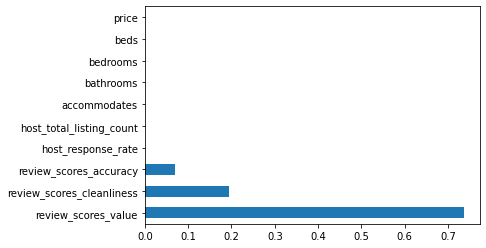

In [74]:
feat_importances = pd.Series(tree_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind = 'barh');

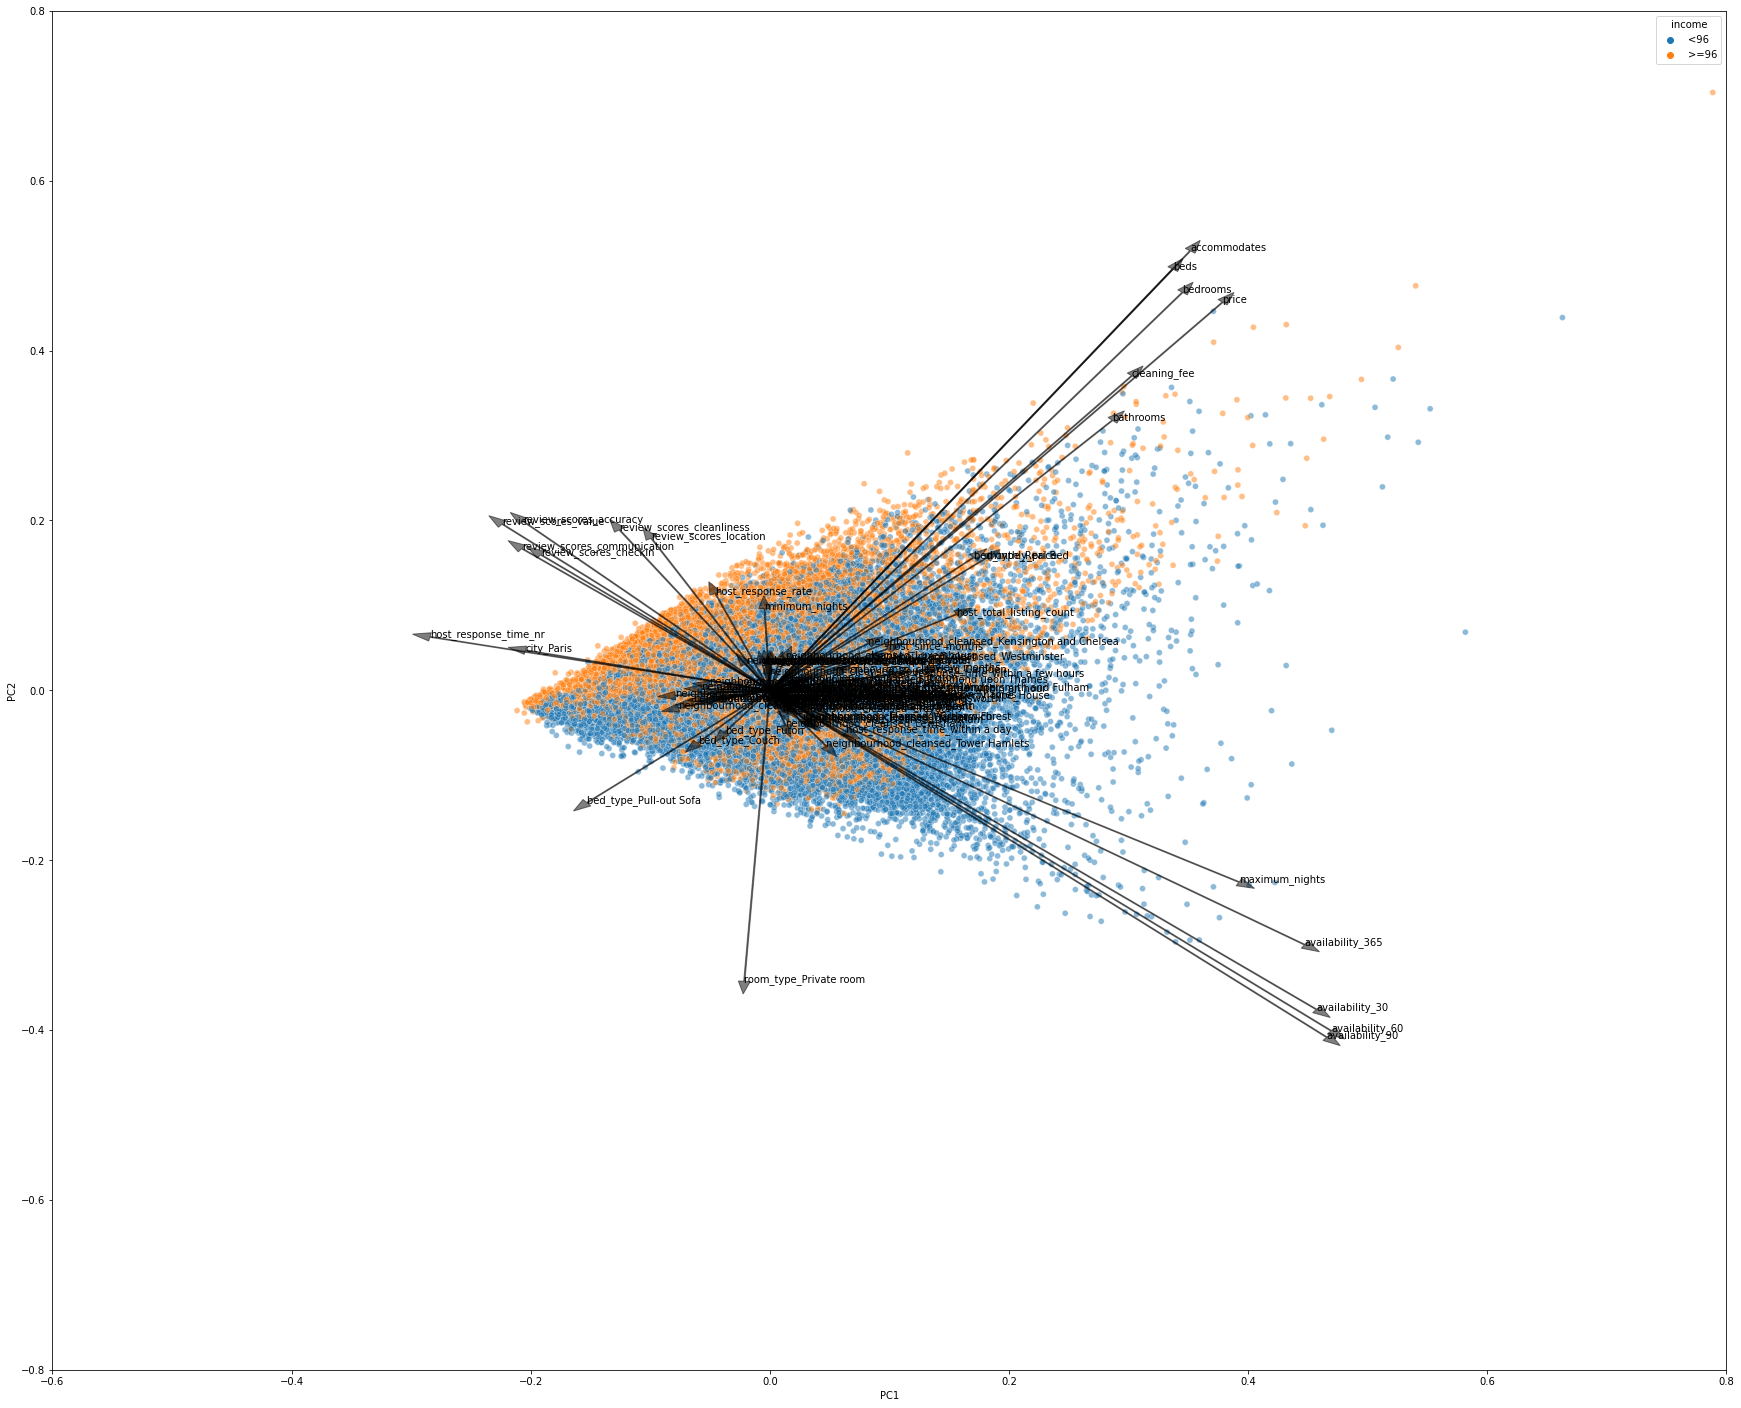

In [75]:
n = X_train.shape[1]

pca = PCA(n_components=2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_new = pca.fit_transform(X_train_scaled)

coeff = pca.components_.transpose()

xs = X_new[:,0]
ys = X_new[:,1]
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

principalDf = pd.DataFrame({'PC1': xs*scalex, 'PC2':ys * scaley})

y_train_pred = lr.predict(X_train_scaled)
finalDF = pd.concat([principalDf, pd.Series(y_train_pred, name='income')], axis = 1)

plt.figure(figsize=(30,25))

sns.scatterplot(x='PC1', y='PC2', hue= 'income', data = finalDF, alpha = 0.5);

for i in range(n):
    plt.arrow(0, 0, coeff[i,0]*1.5, coeff[i,1]*1.5,color = 'k',alpha = 0.5, head_width=0.01, )
    plt.text(coeff[i,0]*1.5, coeff[i,1] *1.5, X_train.columns[i], color = 'k')
    
plt.xlim(-0.6,0.8)
plt.ylim(-0.8,0.8);

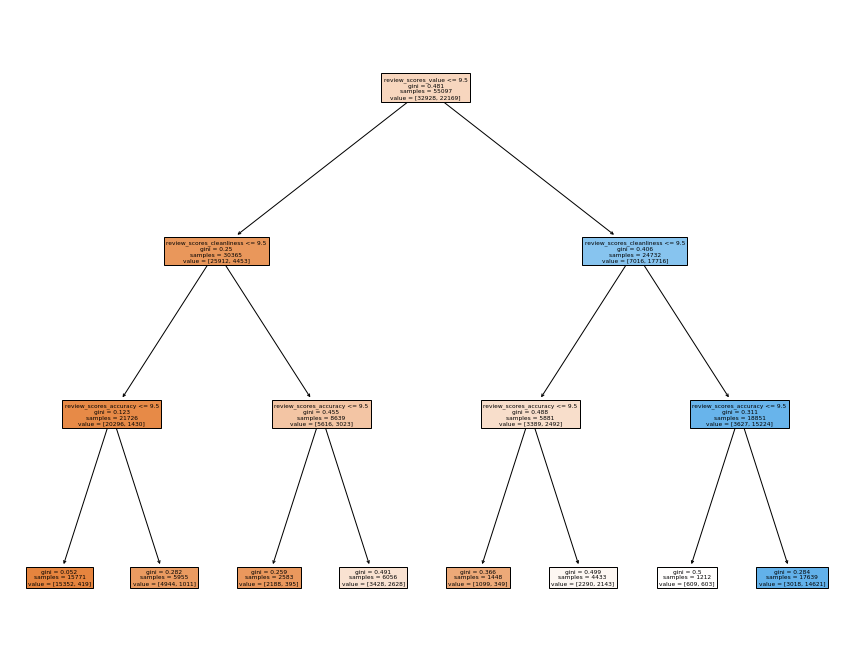

In [76]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,12))
plot_tree(tree_clf, feature_names = X_train.columns.tolist(), filled=True);

In [80]:
#!pip install shap

In [81]:
import shap
import xgboost as xgb

# Encodage de la variable cible en 0/1
y_train = [0 if x == '<96' else 1 for x in y_train]
y_test = [0 if x == '<96' else 1 for x in y_test]

# Paramètres d'entraînement
params = {'objective': 'binary:logistic', 'max_depth': 100}

# Co,version des jeux de données en DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest =  xgb.DMatrix(data = X_test, label = y_test)

# Entraînement du modèle
bst = xgb.train(params, dtrain, 200)

In [82]:
probs = bst.predict(dtest)
preds = [0 if x<0.5 else 1 for x in probs]

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      8232
           1       0.78      0.79      0.78      5543

    accuracy                           0.83     13775
   macro avg       0.82      0.82      0.82     13775
weighted avg       0.83      0.83      0.83     13775



# **Predictions RandomForest**

In [83]:
#On lance un model de random forest pour essayer d'améliorer le model

In [ ]:
from sklearn import model_selection
from sklearn import ensemble
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier

#on ajuste X_train
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
#on applique la meme transformation à X_test
X_test_scaled = scaler.transform(X_test)

# Création du classificateur et construction du modèle sur les données d'entraînement
clf_rf = ensemble.RandomForestClassifier() 

#On entraine l'algorithme sur l'ensemble d'entraînement (X_train_scaled et y_train).
clf_rf.fit(X_train_scaled, y_train)

#On crée un dictionnaire parametres contenant les valeurs possibles prises pour le paramètre
params_rf=[{'min_samples_split': [(i) for i in range (1,100,1)], 
                 'max_features': ['sqrt', 'log2']}]

#On applique la fonction model_selection.GridSearchCV() au modèle clf
grid_clf_rf = model_selection.GridSearchCV(estimator=clf_rf, param_grid=params_rf)

#On entraîne grid_clf sur l'ensemble d'entraînement, (X_train_scaled, y_train) 
#ET on sauvegarde les résultats dans l'objet grille.

grille_rf = grid_clf_rf.fit(X_train_scaled,y_train)

#on affiche toutes les combinaisons possibles d'hyperparamètres 
#et la performance moyenne du modèle associé par validation croisée.
print(pd.DataFrame.from_dict(grille_rf.cv_results_).loc[:,['params', 'mean_test_score']])

#on affiche la meilleur combinaison
print('\n''le meilleur paramètre est:',(grid_clf_rf.best_params_))

In [ ]:
#Prédiction des features test et création de la matrice de confusion
y_pred = grid_clf_rf.predict(X_test_scaled)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

In [ ]:
#on affiche le score obtenu avec ce modèle
print("score:",grid_clf_rf.score(X_test_scaled,y_test))